# **Part-A**


1.Importing Libraries



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

2.1.Importing the Global Retail data

In [ ]:
path = "/content/drive/MyDrive/Global+Superstore+Data.csv"

In [ ]:
global_retail = pd.read_csv(path)
global_retail.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [ ]:
global_retail.shape

(51290, 5)

In [ ]:
global_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [ ]:
global_retail.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


2.2.Data Preparation


In [ ]:
 #Finding the 21 unique Market Segments
 global_retail['market_segments'] = global_retail['Market'] + '_' + global_retail['Segment']
 global_retail.head()

,Order Date,Segment,Market,Sales,Profit,market_segments
0,31-07-2012,Consumer,US,2309.650,762.1845,US_Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Africa_Consumer


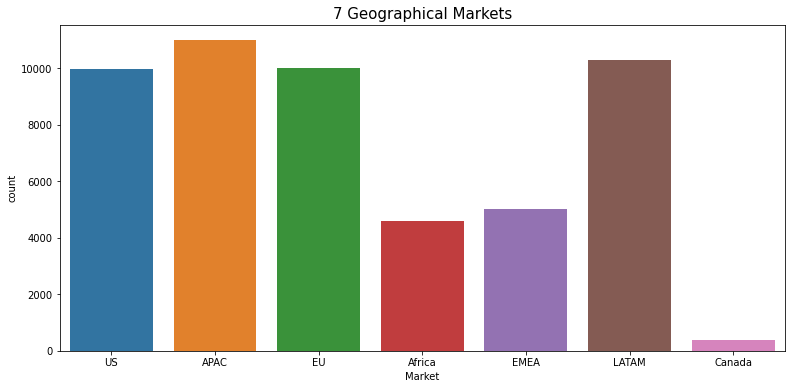

In [ ]:
#Plotting Market,Segments and market_segments to visualize the data.
##Market Plotting
plt.figure(figsize=(13,6))
sns.countplot(global_retail['Market'])
plt.title('7 Geographical Markets', size=15)
plt.show()

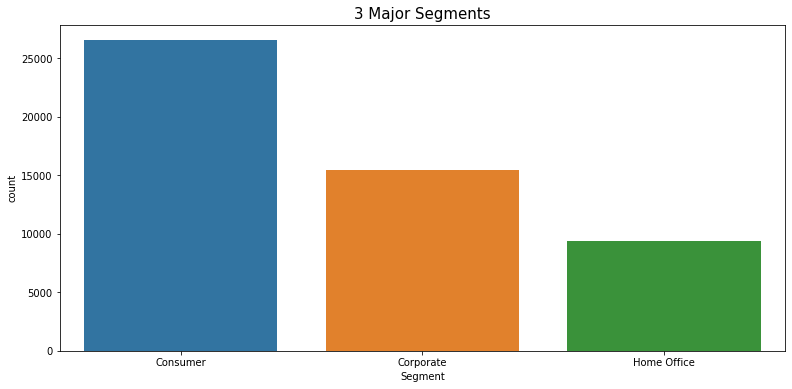

In [ ]:
##Segments Plotting
plt.figure(figsize=(13,6))
sns.countplot(global_retail['Segment'])
plt.title('3 Major Segments', size=15)
plt.show()

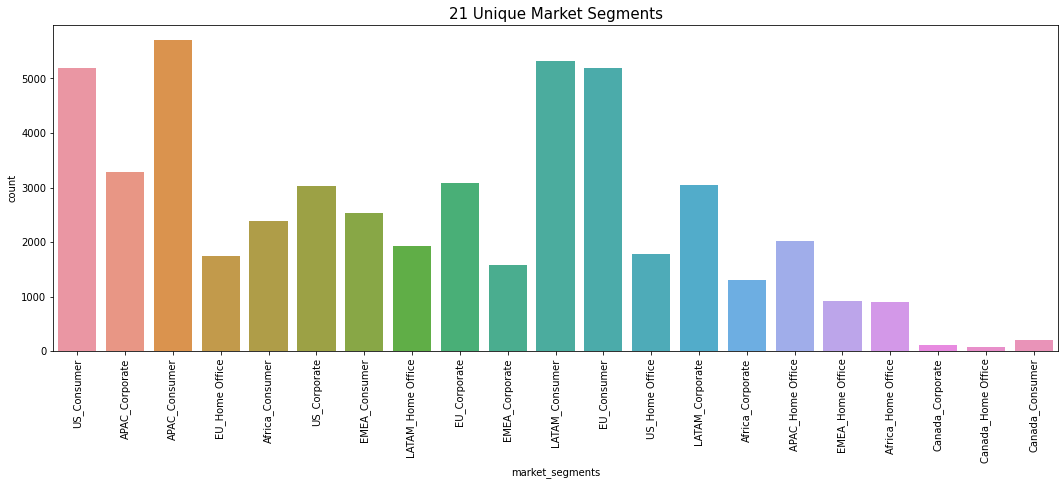

In [ ]:
##21 unique Market Segments Plotting
plt.figure(figsize=(18,6))
sns.countplot(global_retail['market_segments'])
plt.title('21 Unique Market Segments', size=15)
plt.xticks(rotation=90)
plt.show()

APAC_Consumer has the highest count amongst the 21 unique market segments


In [ ]:
##Dropping 'Market' and 'Segment' column
global_retail = global_retail.drop(['Market', 'Segment'] , axis=1)
global_retail.head()                             

,Order Date,Sales,Profit,market_segments
0,31-07-2012,2309.650,762.1845,US_Consumer
1,05-02-2013,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,5175.171,919.9710,APAC_Consumer
3,28-01-2013,2892.510,-96.5400,EU_Home Office
4,05-11-2013,2832.960,311.5200,Africa_Consumer


3.Converting order-date into month-year format

In [ ]:
global_retail['Order Date'] = pd.to_datetime(global_retail['Order Date']).dt.to_period('m')
global_retail = global_retail.sort_values(by=['Order Date'])
global_retail.head()


,Order Date,Sales,Profit,market_segments
15262,2011-01,139.65,15.30,EU_Corporate
26744,2011-01,88.44,15.84,EU_Consumer
48614,2011-01,11.43,4.11,EU_Corporate
9417,2011-01,491.00,122.70,LATAM_Consumer
48590,2011-01,4.71,0.00,US_Home Office


In [ ]:
#monthly aggregated transaction data to get 48 months
global_retail_agg = global_retail.pivot_table( index='Order Date' , values='Profit' , columns='market_segments', aggfunc='sum')
global_retail_agg.head()

market_segments,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [ ]:
global_retail_agg.shape

(48, 21)

4.Train-Test split


In [ ]:
#Train: 42months
#Test:  6months
train_len = 42
train = global_retail_agg[0:train_len]
test = global_retail_agg[train_len:0]
train.head()

market_segments,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [ ]:
train.shape

(42, 21)

5. CoV on the profit for each of the 21 market segments

In [ ]:
#creating empty dataframe having market segments and its CoV values
cov = pd.DataFrame(columns = ['market_segments', 'COV'])
cov.head()

,market_segments,COV


In [ ]:
for i in train.columns :
  a = {'market_segments':i , 'COV': np.std(train[i]) / np.mean(train[i]) }
  cov = cov.append(a,ignore_index=True)

cov.head()

,market_segments,COV
0,APAC_Consumer,0.522725
1,APAC_Corporate,0.530051
2,APAC_Home Office,1.008219
3,Africa_Consumer,1.310351
4,Africa_Corporate,1.891744


APAC_Consumer has the least CoV thus we can infer that "APAC_Consumer" is the most profitable Market Segment


# **Part-B**


1. Droppinng the rest 20 market segments


In [ ]:
retail_df = global_retail[ global_retail ['market_segments'] == "APAC_Consumer"]
retail_df.head()

,Order Date,Sales,Profit,market_segments
1080,2011-01,1429.050,371.490,APAC_Consumer
9203,2011-01,219.780,59.340,APAC_Consumer
19331,2011-01,342.510,54.600,APAC_Consumer
26270,2011-01,102.762,1.842,APAC_Consumer
14830,2011-01,420.420,147.000,APAC_Consumer


In [ ]:
#filtering Order Date and Sales
retail_df = retail_df[['Order Date' , 'Sales']]
retail_df.head()

,Order Date,Sales
1080,2011-01,1429.050
9203,2011-01,219.780
19331,2011-01,342.510
26270,2011-01,102.762
14830,2011-01,420.420


In [ ]:
#grouping the data according to the order date
retail_df = retail_df.groupby ('Order Date').sum()
retail_df.head()

,Sales
Order Date,
2011-01,18821.9898
2011-02,23313.3531
2011-03,26518.4919
2011-04,12046.0923
2011-05,25941.9000


In [ ]:
#converting the Order date back to pandas datetime format
retail_df = retail_df.to_timestamp()
retail_df.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


2. Train-Test Split

In [ ]:
#Train: 42months
#Test:  6months
train_len = 42
train_data = retail_df[0:train_len]
test_data = retail_df[train_len:]
train_data.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


3. Decomposition of the time-series
(To find the trend, seasonality and residual parts of the data)

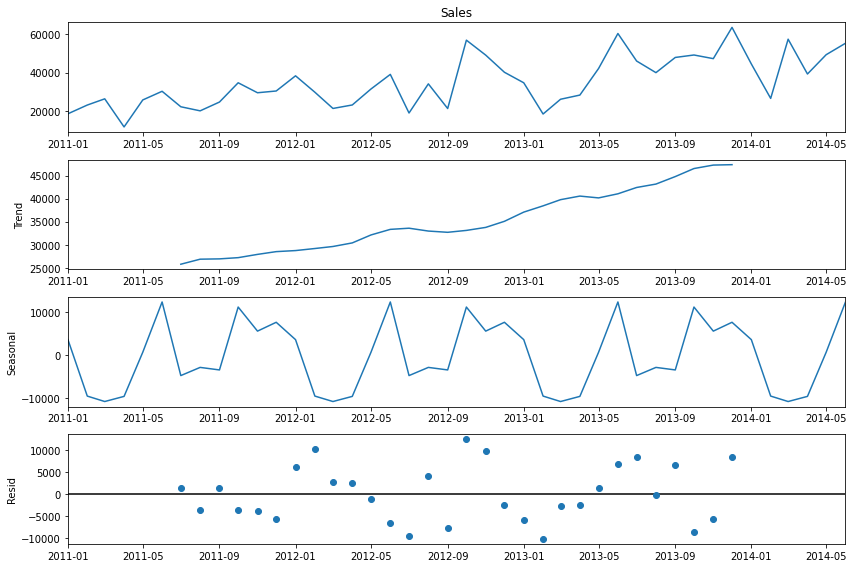

In [ ]:
#Additive seasonal decomposition

from pylab import rcParams
import statsmodels.api as sm
rcParams ['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(train_data.Sales , model='additive')
fig = decomposition.plot()
plt.show()

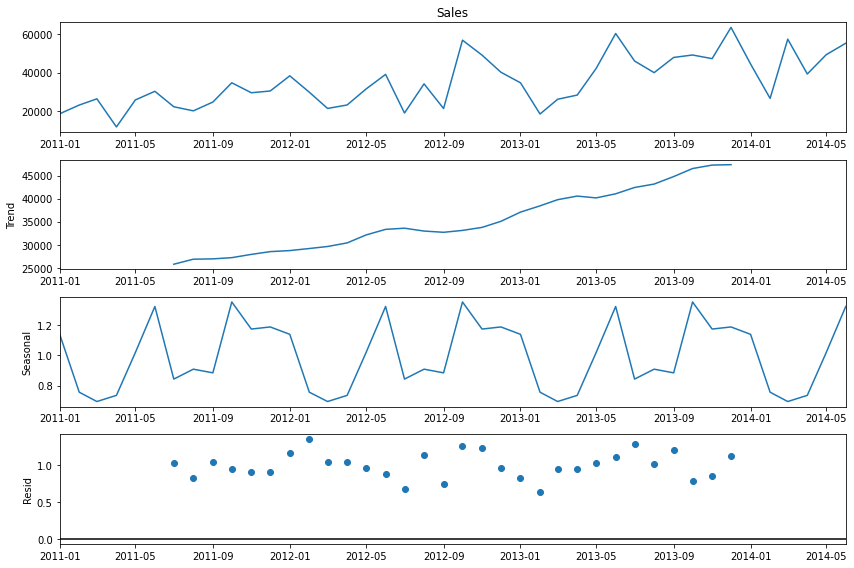

In [ ]:
#Multiplicative seasonal decomposition

from pylab import rcParams
import statsmodels.api as sm
rcParams ['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(train_data.Sales , model='multiplicative')
fig = decomposition.plot()
plt.show()

4. The Smoothing Techniques 

In [ ]:
#Naive method
##Forecast = Last month’s sales

y_hat_naive = test_data.copy()
y_hat_naive['naive_forecast'] = train_data['Sales'][train_len-1]

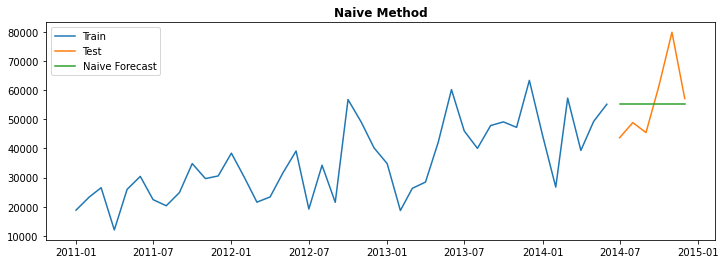

In [ ]:
#Plotting the grapgh for Naive method
plt.figure(figsize=(12,4))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data['Sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive Forecast')
plt.legend(loc='best')
plt.title('Naive Method', fontweight= 'bold')
plt.show()

We can see that the forecast for the next six months is the same value(green line) as the last observation of the blue line









4.1 Calculating RMSE and MAPE for Naive Method

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_data['Sales'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_data['Sales']-y_hat_naive['naive_forecast'])/test_data['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47


In [ ]:
#Simple Average method
##Forecast = Average of all past months’ sales

y_hat_avg = test_data.copy()
y_hat_avg['avg_forecast'] = train_data['Sales'].mean()

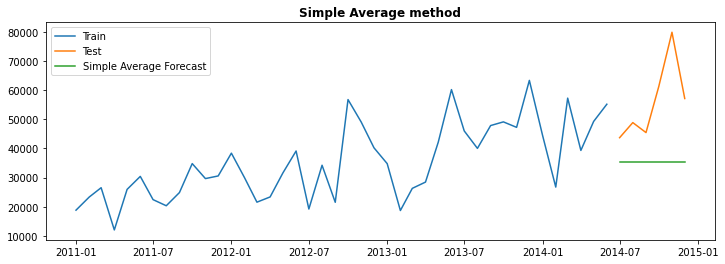

In [ ]:
#Plotting the grapgh for Simple Average method
plt.figure(figsize=(12,4))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple Average Forecast')
plt.legend(loc='best')
plt.title('Simple Average method', fontweight= 'bold')
plt.show()

Green line is the average of the 42months. It is not showing any treand or seasonality.

4.2 Calculating RMSE and MAPE for Simple Average Method

In [ ]:
rmse = np.sqrt(mean_squared_error(test_data['Sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_data['Sales']-y_hat_avg['avg_forecast'])/test_data['Sales'])*100,2)

tempresults = pd.DataFrame({'Method':['Simple Average Method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = pd.concat([results , tempresults])
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average Method,24146.06,34.34


In [ ]:
#Simple Moving Average method
##Forecast= Average of only the last few observations to forecast the future

y_hat_sma = retail_df.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = retail_df['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

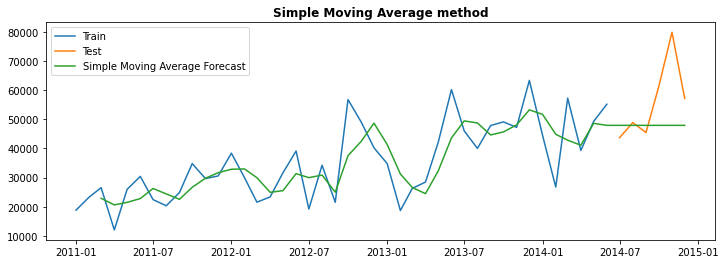

In [ ]:
#Plotting the grapgh for Simple Moving Average method
plt.figure(figsize=(12,4))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple Moving Average Forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average method', fontweight= 'bold')
plt.show()

4.3 Calculating RMSE and MAPE for Simple Moving Average Method

In [ ]:
rmse = np.sqrt(mean_squared_error(test_data['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test_data['Sales']-y_hat_sma['sma_forecast'])/test_data['Sales'])*100,2)

tempresults = pd.DataFrame({'Method':['Simple Moving Average Method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = pd.concat([results , tempresults])
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,14756.73,15.82


In [ ]:
#Simple Exponential Smoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train_data['Sales'])
model_fit = model.fit(smoothing_level=0.2 , optimized=False)
model_fit.params
y_hat_ses = test_data.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

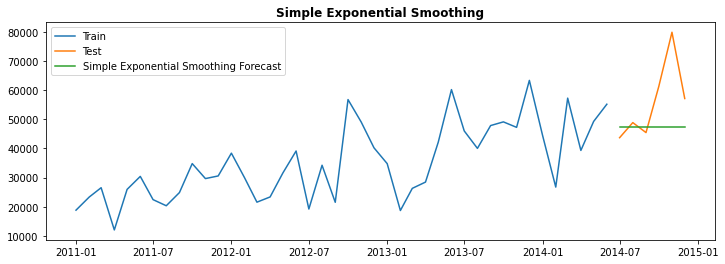

In [ ]:
#Plotting the grapgh for Simple Exponential Smoothing

plt.figure(figsize=(12,4))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple Exponential Smoothing Forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing', fontweight= 'bold')
plt.show()

4.4 Calculating RMSE and MAPE for Simple Exponential Smoothing


In [ ]:
rmse = np.sqrt(mean_squared_error(test_data['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_data['Sales']-y_hat_ses['ses_forecast'])/test_data['Sales'])*100,2)

tempresults = pd.DataFrame({'Method':['Simple Exponential Smoothing'], 'MAPE': [mape], 'RMSE': [rmse]})
results = pd.concat([results , tempresults])
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,14756.73,15.82
0,Simple Exponential Smoothing,15011.49,15.99


In [ ]:
#Holt's Exponential Smoothing 

from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train_data['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test_data.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 18821.9898, 'initial_trend': 4491.363300000001, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


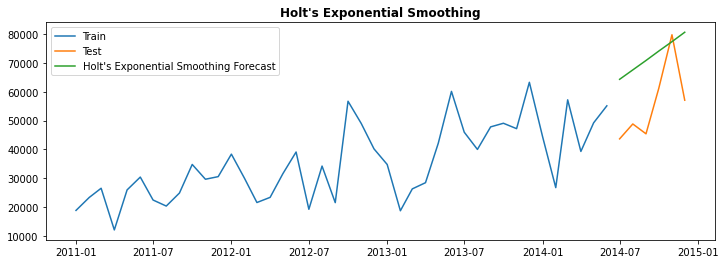

In [ ]:
#Plotting the grapgh for Holt's Exponential Smoothing

plt.figure(figsize=(12,4))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s Exponential Smoothing Forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing', fontweight= 'bold')
plt.show()

4.5 Calculating RMSE and MAPE for  Holt's Exponential Smoothing


In [ ]:
rmse = np.sqrt(mean_squared_error(test_data['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_data['Sales']-y_hat_holt['holt_forecast'])/test_data['Sales'])*100,2)

tempresults = pd.DataFrame({'Method':['Holt\'s Exponential Smoothing Forecast'], 'MAPE': [mape], 'RMSE': [rmse]})
results = pd.concat([results , tempresults])
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,14756.73,15.82
0,Simple Exponential Smoothing,15011.49,15.99
0,Holt's Exponential Smoothing Forecast,18976.37,34.57


In [ ]:
#Holt-Winter's Exponential Smoothing - 'Additive'

y_hat_hwa = test_data.copy()
model = ExponentialSmoothing(np.asarray(train_data['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hwa_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.07571428571428572, 'smoothing_trend': 0.010816326530612248, 'smoothing_seasonal': 0.1026984126984127, 'damping_trend': nan, 'initial_level': 34110.965325000005, 'initial_trend': 730.4167145833334, 'initial_seasons': array([-15288.975525, -10797.612225,  -7592.473425, -22064.873025,
        -8169.065325,  -3712.033725, -11679.370425, -13779.891825,
        -9250.570425,    676.322775,  -4462.610625,  -3556.103925]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


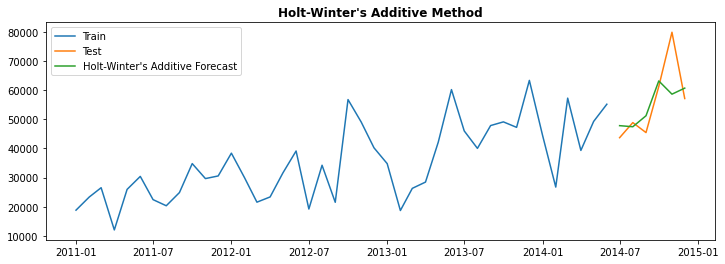

In [ ]:
#Plotting the graph for Holt-Winter's Exponential Smoothing - 'Additive'

plt.figure(figsize=(12,4))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data['Sales'], label='Test')
plt.plot(y_hat_hwa['hwa_forecast'], label='Holt-Winter\'s Additive Forecast')
plt.legend(loc='best')
plt.title('Holt-Winter\'s Additive Method', fontweight= 'bold')
plt.show()

4.6 Calculating RMSE and MAPE for Holt-Winter's Exponential Smoothing - 'Additive'

In [ ]:
rmse = np.sqrt(mean_squared_error(test_data['Sales'], y_hat_hwa['hwa_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_data['Sales']-y_hat_hwa['hwa_forecast'])/test_data['Sales'])*100,2)

tempresults = pd.DataFrame({'Method':['Holt-Winter\'s Additive Method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = pd.concat([results , tempresults])
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,14756.73,15.82
0,Simple Exponential Smoothing,15011.49,15.99
0,Holt's Exponential Smoothing Forecast,18976.37,34.57
0,Holt-Winter's Additive Method,9306.82,10.17


In [ ]:
#Holt-Winter's Exponential Smoothing - 'Multiplicative'

y_hat_hwm = test_data.copy()
model = ExponentialSmoothing(np.asarray(train_data['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hwm_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.040357142857142855, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.13709183673469388, 'damping_trend': nan, 'initial_level': 34110.965325000005, 'initial_trend': 730.4167145833334, 'initial_seasons': array([0.55178708, 0.68345627, 0.77741839, 0.35314428, 0.76051498,
       0.8911777 , 0.65760657, 0.5960275 , 0.72880948, 1.01982714,
       0.86917372, 0.89574895]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


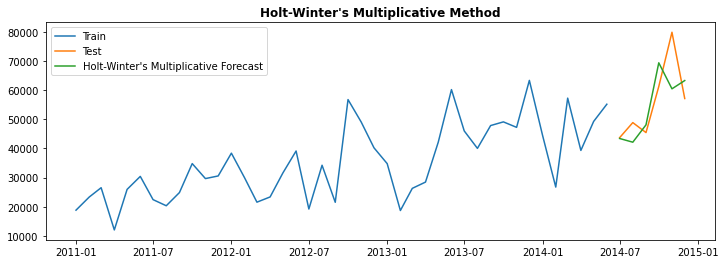

In [ ]:
#Plotting the graph for Holt-Winter's Exponential Smoothing - 'Multiplicative'

plt.figure(figsize=(12,4))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data['Sales'], label='Test')
plt.plot(y_hat_hwm['hwm_forecast'], label='Holt-Winter\'s Multiplicative Forecast')
plt.legend(loc='best')
plt.title('Holt-Winter\'s Multiplicative Method', fontweight= 'bold')
plt.show()

4.6 Calculating RMSE and MAPE for Holt-Winter's Exponential Smoothing - 'Multiplicative
'

In [ ]:
rmse = np.sqrt(mean_squared_error(test_data['Sales'], y_hat_hwm['hwm_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_data['Sales']-y_hat_hwm['hwm_forecast'])/test_data['Sales'])*100,2)

tempresults = pd.DataFrame({'Method':['Holt-Winter\'s Multiplicative Method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = pd.concat([results , tempresults])
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,14756.73,15.82
0,Simple Exponential Smoothing,15011.49,15.99
0,Holt's Exponential Smoothing Forecast,18976.37,34.57
0,Holt-Winter's Additive Method,9306.82,10.17
0,Holt-Winter's Multiplicative Method,9423.23,11.43


From the above Techniques performed we can see that RMSE and Mape values are least for Holt Winter's Additive Method and thus it is giving the better forecast of the sales for the 6 months, since the predicted sales are closer to the actual sales.

5.ARIMA Techniques

5.1 To check if the time series is stationery

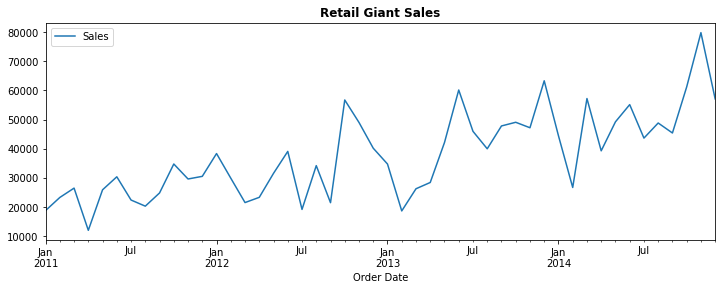

In [ ]:
#Visualizing the time-series data

retail_df['Sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Giant Sales', fontweight='bold')
plt.show(block=False)

Augmented Dickey-Fuller (ADF) test


Null Hypothesis(H0)          : The series is not stationary  p−value>0.05 


Alternate Hypothesis(H1): The series is stationary      p−value<=0.05

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(retail_df['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.376024
Critical Values @ 0.05: -2.93
p-value: 0.011804


In [ ]:
#P-value 0.011 is less than 0.05 hence the series is stationery and we reject the Null Hypothesis.

Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

Null Hypothesis  (H0) : The series is stationary  p−value>0.05 

Alternate Hypothesis (H1) : The series is not stationary  p−value<=0.05

In [ ]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(retail_df['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.577076
Critical Values @ 0.05: 0.46
p-value: 0.024720


In [ ]:
#P-value 0.024 is less than 0.05 hence the series is not stationery and we fail to reject the null hypothesis.

5.2 To make the time series data stationery.

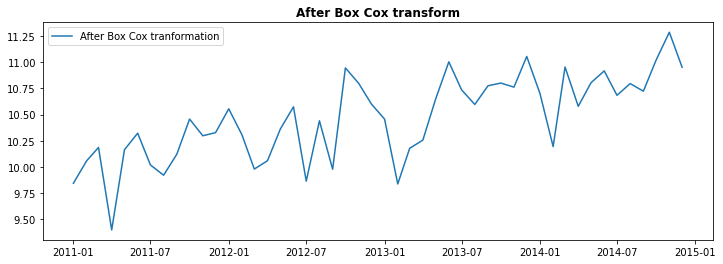

In [ ]:
#Box Cox transformation

from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(retail_df['Sales'], lmbda=0), index = retail_df.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform', fontweight= 'bold')
plt.show()

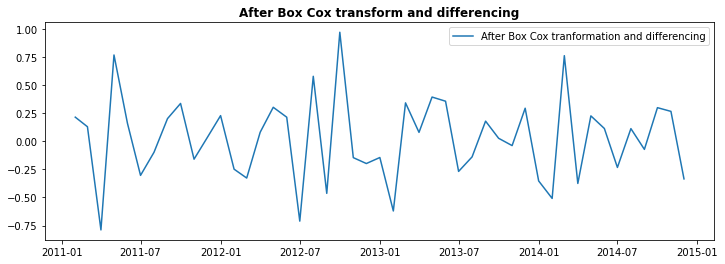

In [ ]:
#Differencing to remove the trend.

data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), retail_df.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing', fontweight='bold')
plt.show()



*   The time series looks stationery and under constant limits.




In [ ]:
data_boxcox_diff.dropna(inplace=True)

In [ ]:
#To check if the data is stationery,
## ADF Test

adf_test_final = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test_final[0])
print('Critical Values @ 0.05: %.2f' % adf_test_final[4]['5%'])
print('p-value: %f' % adf_test_final[1])

ADF Statistic: -4.535011
Critical Values @ 0.05: -2.95
p-value: 0.000170


In [ ]:
#P-value 0.0001 is less than 0.05 hence the series is stationery and we reject the Null Hypothesis.

In [ ]:
#To check if the data is stationery,
## KPSS Test

kpss_test_final = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test_final[0])
print('Critical Values @ 0.05: %.2f' % kpss_test_final[3]['5%'])
print('p-value: %f' % kpss_test_final[1])

KPSS Statistic: 0.156456
Critical Values @ 0.05: 0.46
p-value: 0.100000


In [ ]:
#P-value 0.10 is greater than 0.05 hence the series is stationery and hence we fail to reject the Null Hypothesis.

5.3 AR (Auto regression) Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.024665
ar.L1.y   -0.408941
dtype: float64


Recover original time series

In [ ]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

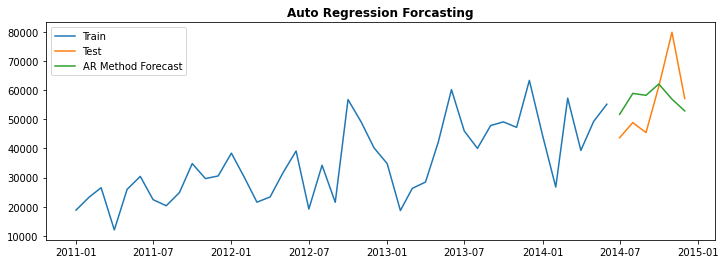

In [ ]:
#Plotting the graph for AR forecast

plt.figure(figsize=(12,4))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'] [test_data.index.min():], label='AR Method Forecast')
plt.legend(loc='best')
plt.title('Auto Regression Forcasting', fontweight= 'bold')
plt.show()

In [ ]:
#Calculating RMSE and MAPE value for AR Model

rmse = np.sqrt(mean_squared_error(test_data['Sales'], y_hat_ar['ar_forecast'] [test_data.index.min():] )).round(2)
mape = np.round(np.mean(np.abs(test_data['Sales']-y_hat_ar['ar_forecast'] [test_data.index.min():] )/test_data['Sales'])*100,2)

tempresults = pd.DataFrame({'Method':['Auto Regression (AR) Method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = pd.concat([results , tempresults])
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,14756.73,15.82
0,Simple Exponential Smoothing,15011.49,15.99
0,Holt's Exponential Smoothing Forecast,18976.37,34.57
0,Holt-Winter's Additive Method,9306.82,10.17
0,Holt-Winter's Multiplicative Method,9423.23,11.43
0,Auto Regression (AR) Method,12059.68,17.42


5.4 MA (Moving Average)  Method

In [ ]:
model = ARIMA(data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.021496
ma.L1.y   -1.000000
dtype: float64


Recover original time series

In [ ]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

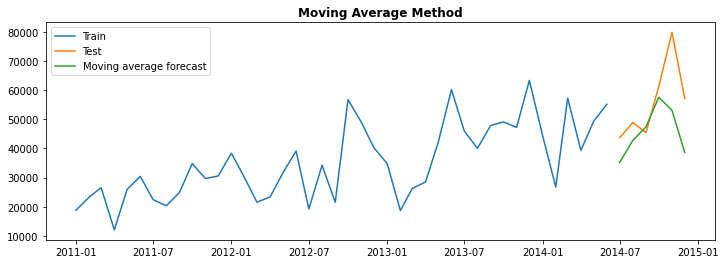

In [ ]:
#Plotting the graph for AR forecast

plt.figure(figsize=(12,4))
plt.plot(retail_df['Sales'][:train_len], label='Train')
plt.plot(retail_df['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test_data.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method', fontweight='bold')
plt.show()

In [ ]:
#Calculating RMSE and MAPE value for MA Model

rmse = np.sqrt(mean_squared_error(test_data['Sales'], y_hat_ma['ma_forecast'][test_data.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_data['Sales']-y_hat_ma['ma_forecast'][test_data.index.min():])/test_data['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,14756.73,15.82
0,Simple Exponential Smoothing,15011.49,15.99
0,Holt's Exponential Smoothing Forecast,18976.37,34.57
0,Holt-Winter's Additive Method,9306.82,10.17
0,Holt-Winter's Multiplicative Method,9423.23,11.43
0,Auto Regression (AR) Method,12059.68,17.42
0,Moving Average (MA) method,14057.47,18.05


5.5 ARMA (Auto regression moving average) Method

In [ ]:
model = ARIMA (data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.021517
ar.L1.y    0.076459
ma.L1.y   -1.000000
dtype: float64


Recover original time series



In [ ]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

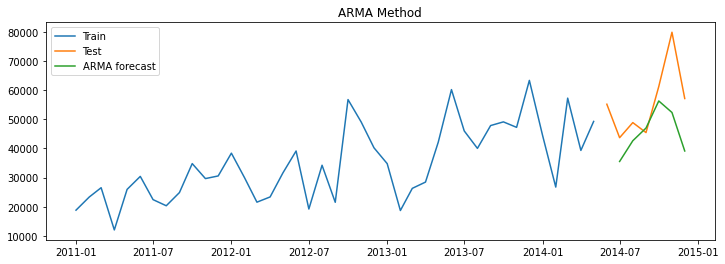

In [ ]:
#Plotting the graph for ARMA forecast

plt.figure(figsize=(12,4))
plt.plot(retail_df['Sales'][:train_len-1], label='Train')
plt.plot(retail_df['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test_data.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

In [ ]:
#Calculating the RMSE and MAPE for ARMA Method

rmse = np.sqrt(mean_squared_error(test_data['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test_data['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test_data['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,14756.73,15.82
0,Simple Exponential Smoothing,15011.49,15.99
0,Holt's Exponential Smoothing Forecast,18976.37,34.57
0,Holt-Winter's Additive Method,9306.82,10.17
0,Holt-Winter's Multiplicative Method,9423.23,11.43
0,Auto Regression (AR) Method,12059.68,17.42
0,Moving Average (MA) method,14057.47,18.05
0,Autoregressive moving average (ARMA) method,14217.38,18.15


5.6. ARIMA (Auto regressive integrated moving average) Method


In [ ]:
model = ARIMA(data_boxcox, order=(1, 1, 1))
print(model_fit.params)

const      0.021517
ar.L1.y    0.076459
ma.L1.y   -1.000000
dtype: float64


Recovering the origianal time series forecast

In [ ]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

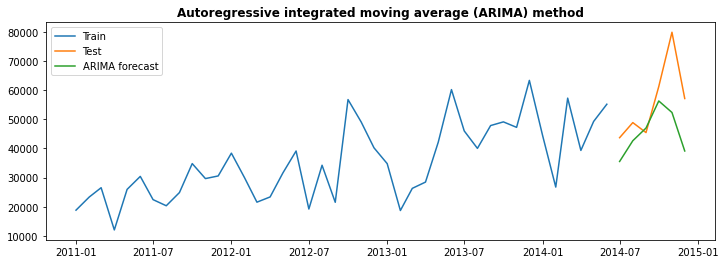

In [ ]:
#Plotting grapgh for ARIMA method

plt.figure(figsize=(12,4))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test_data.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method', fontweight='bold')
plt.show()

In [ ]:
#Calculating RMSe and MAPE values for ARIMA method

rmse = np.sqrt(mean_squared_error(test_data['Sales'], y_hat_arima['arima_forecast'][test_data.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_data['Sales']-y_hat_arima['arima_forecast'][test_data.index.min():])/test_data['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,14756.73,15.82
0,Simple Exponential Smoothing,15011.49,15.99
0,Holt's Exponential Smoothing Forecast,18976.37,34.57
0,Holt-Winter's Additive Method,9306.82,10.17
0,Holt-Winter's Multiplicative Method,9423.23,11.43
0,Auto Regression (AR) Method,12059.68,17.42
0,Moving Average (MA) method,14057.47,18.05
0,Autoregressive moving average (ARMA) method,14217.38,18.15


5.7 SARIMA (Seasonal auto regressive integrated moving average) Method

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.066201
ma.L1      -0.996160
ar.S.L12   -0.011343
ma.S.L12   -0.962602
sigma2      0.048098
dtype: float64


Recovering the original time series forecast

In [ ]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

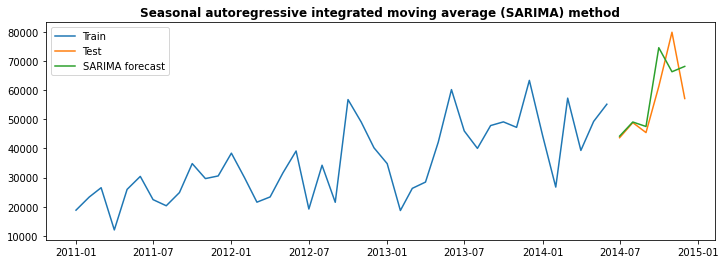

In [ ]:
#Plotting grapgh for SARIMA Method

plt.figure(figsize=(12,4))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test_data.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method',fontweight='bold')
plt.show()

In [ ]:
#Calculating the RMSE and MAPE values for SARIMA Method

rmse = np.sqrt(mean_squared_error(test_data['Sales'], y_hat_sarima['sarima_forecast'][test_data.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_data['Sales']-y_hat_sarima['sarima_forecast'][test_data.index.min():])/test_data['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average method (SARIMA) '], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,14756.73,15.82
0,Simple Exponential Smoothing,15011.49,15.99
0,Holt's Exponential Smoothing Forecast,18976.37,34.57
0,Holt-Winter's Additive Method,9306.82,10.17
0,Holt-Winter's Multiplicative Method,9423.23,11.43
0,Auto Regression (AR) Method,12059.68,17.42
0,Moving Average (MA) method,14057.47,18.05
0,Autoregressive moving average (ARMA) method,14217.38,18.15


6. Among all the methods done in the ARIMA above, we can conclude that forecast done using SARIMA method is able to predict the sales closer to the actual values since the RMSE and MAPE is lowest amongst others.

7. Hence we can conclude:


*   Holt-Winter's Additive Method is the best forecasting method amongst the Smoothening Techniques having the least RMSE: 9306.8 and MAPE: 10.17. 
*   (SARIMA) Seasonal autoregressive integrated moving average is the best forecasting method amongst ARIMA Techniques having RMSE: 9006.80 and MAPE: 10.71.

